# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression



#2. Load the dataset


In [2]:
# Load the dataset
tw3 = pd.read_csv('/content/drive/MyDrive/Traffic_Jams.csv')

# Display the first few rows of the dataset
tw3.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# 3. Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

## 3.1: Summary Statistics

In [3]:
# Summary Statistics
summary_statistics = tw3.describe()
print(summary_statistics)

              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  6324.000000  6324.000000  6324.000000  6324.000000  6324.000000   
mean     16.043327    64.355629    12.013283    12.557875    18.658128   
std       8.956907    44.307088    11.363955    12.319831    10.724822   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%       8.000000    18.000000     3.000000     1.000000    10.000000   
50%      16.000000    61.000000     9.000000    10.000000    18.000000   
75%      24.000000   101.250000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  6324.000000  
mean    107.584915  
std      55.850784  
min      21.000000  
25%      53.000000  
50%     103.000000  
75%     151.000000  
max     279.000000  


In [23]:
tw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day of the week    6324 non-null   int64  
 1   CarCount           6324 non-null   float64
 2   BikeCount          6324 non-null   float64
 3   BusCount           6324 non-null   float64
 4   TruckCount         6324 non-null   float64
 5   Total              6324 non-null   float64
 6   Traffic Situation  6324 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 346.0 KB


In [24]:
tw3.shape

(6324, 7)

## 3.2: Distribution of the Target Variable

In [26]:

# Calculate the distribution of the target variable
distribution = tw3['Traffic Situation'].value_counts()
distribution_matrix = distribution.values.reshape(1, -1)
print("Distribution Matrix of Traffic Situation:")
print(distribution_matrix)

Distribution Matrix of Traffic Situation:
[[3858 1137  834  495]]


<ipython-input-27-69633882b67e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Traffic Situation', data=tw3, palette=pastel_colors)
<ipython-input-27-69633882b67e>:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x='Traffic Situation', data=tw3, palette=pastel_colors)


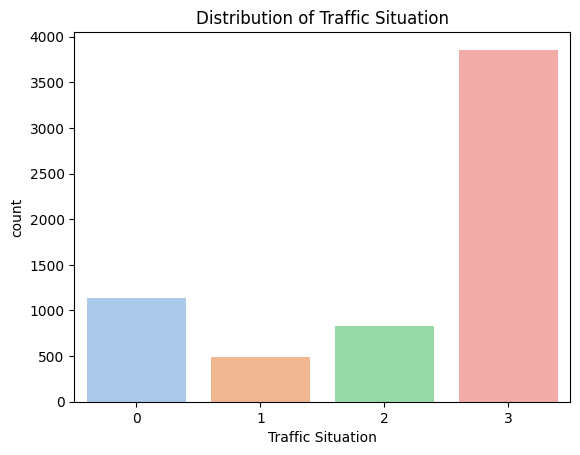

In [27]:
# Plot the distribution of the target variable
pastel_colors = sns.color_palette("pastel")
sns.countplot(x='Traffic Situation', data=tw3, palette=pastel_colors)
plt.title('Distribution of Traffic Situation')
plt.show()

## 3.3 : Correlation Analysis

In [28]:
numeric_columns = tw3.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = tw3[numeric_columns].corr()
# Convert
correlation_array = correlation_matrix.values
#Display the result
print("Correlation Matrix as a Numpy Array:")
print(correlation_array)

Correlation Matrix as a Numpy Array:
[[ 1.          0.01347782 -0.08741156  0.1156302   0.02257365  0.02274748
   0.02417327]
 [ 0.01347782  1.          0.70594134  0.66449135 -0.58398352  0.97138611
  -0.68652071]
 [-0.08741156  0.70594134  1.          0.58128913 -0.58566957  0.77926108
  -0.57533231]
 [ 0.1156302   0.66449135  0.58128913  1.         -0.53384688  0.7634958
  -0.61437217]
 [ 0.02257365 -0.58398352 -0.58566957 -0.53384688  1.         -0.50817932
   0.45470407]
 [ 0.02274748  0.97138611  0.77926108  0.7634958  -0.50817932  1.
  -0.7098938 ]
 [ 0.02417327 -0.68652071 -0.57533231 -0.61437217  0.45470407 -0.7098938
   1.        ]]


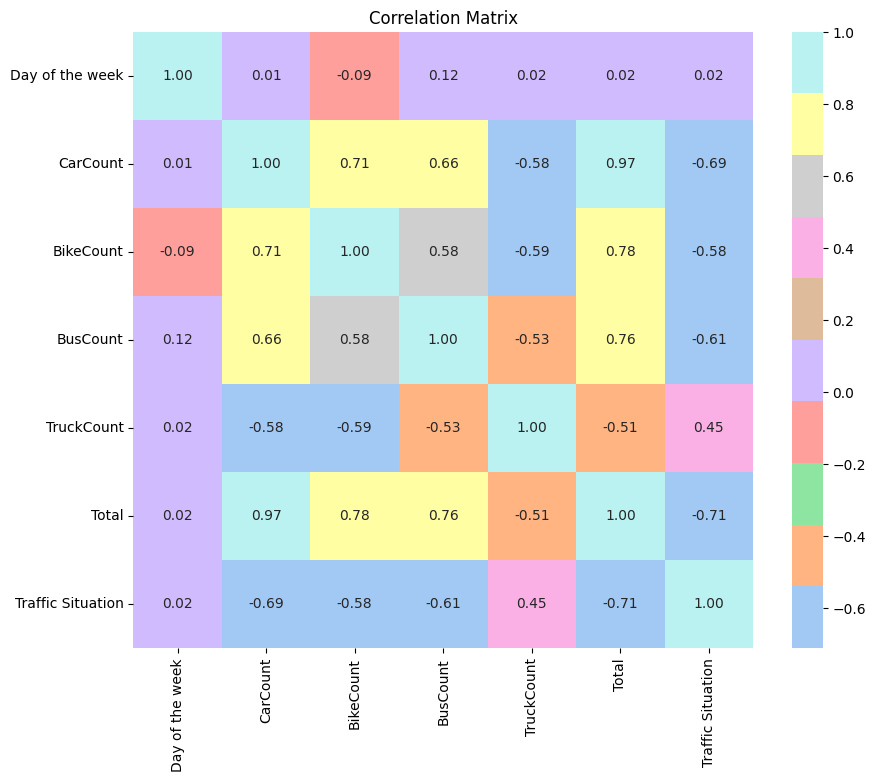

In [29]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("pastel"), fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4: Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

# 4.1 Check for Missing Values



In [9]:
missing_values = tw3.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


# 4.2 Encode Categorical Variables



In [15]:
label_encoder = LabelEncoder()
tw3['Day of the week'] = label_encoder.fit_transform(tw3['Day of the week'])
tw3['Traffic Situation'] = label_encoder.fit_transform(tw3['Traffic Situation'])
#-----

# Prepare the features and target variable
X = tw3[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Day of the week']]
y = tw3['Traffic Situation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4.3 Feature Scaling

In [16]:
scaler = StandardScaler()
numerical_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

tw3[numerical_features] = scaler.fit_transform(tw3[numerical_features])


# 4.4 Remove Unnecessary Columns


In [12]:
tw3.drop(columns=['Time', 'Date'], inplace=True)

# 5 : Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

#5.1 Count Plots for Categorical Features

<ipython-input-19-c763b6948d93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Traffic Situation', data=tw3, palette=pastel_colors)
<ipython-input-19-c763b6948d93>:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x='Traffic Situation', data=tw3, palette=pastel_colors)


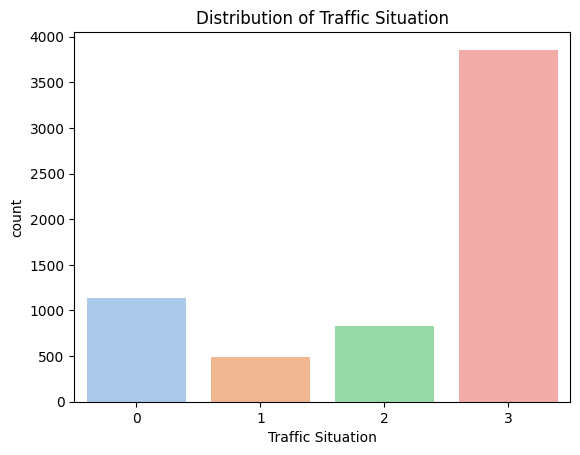

In [19]:
# Plot the distribution of the 'Traffic Situation' feature
pastel_colors = sns.color_palette("pastel")
sns.countplot(x='Traffic Situation', data=tw3, palette=pastel_colors)
plt.title('Distribution of Traffic Situation')
plt.show()


#5.2 Correlation Heatmap

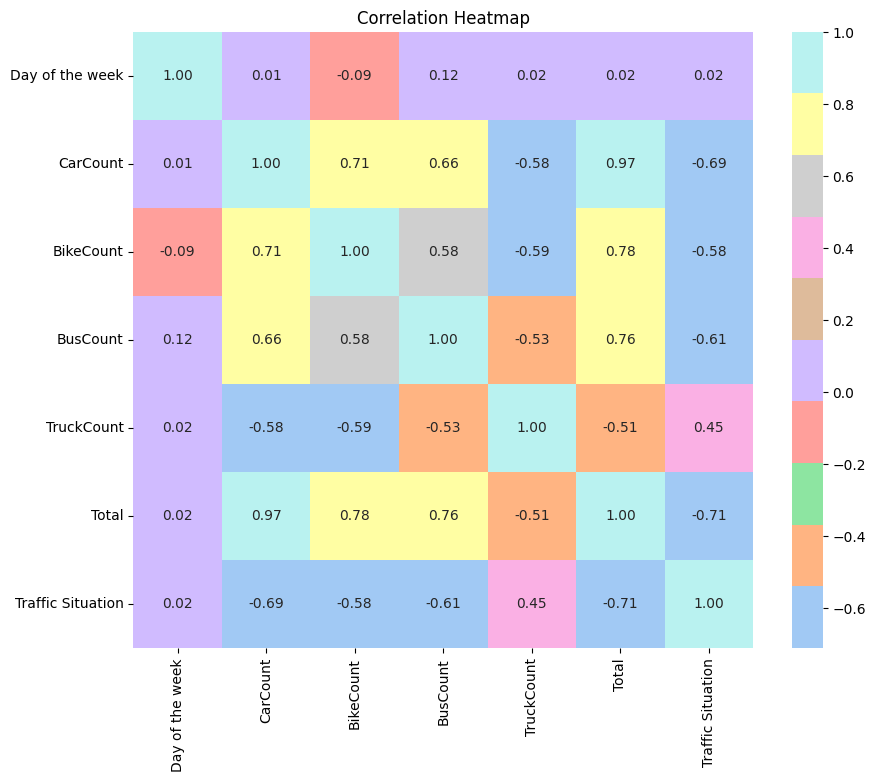

In [30]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("pastel"), fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# 6. Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

# 6.1 Define Features and Target


In [21]:
X = tw3[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Day of the week']]
y = tw3['Traffic Situation']

# 6.2 Train-Test Split


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4426, 6)
Testing data shape: (1898, 6)


# 7. Initialize and Train the Classifiers

## 7.1 Initialize and Train the Random Forest Classifier



In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 7.2 Initialize and Train the Gradient Boosting Classifier



In [32]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## 8. Bagging
Chose the bagging model to go with and initialize and train a the model.

## 8.1 Initialize and Train the Bagging Classifier

In [35]:
base_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(base_estimator=base_model, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, random_state=42)

###9: Evaluate the model performance

##9.1 Evaluate Bagging Classifier Performance

In [36]:
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
classification_rep_bagging = classification_report(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

# Print the accuracy
print("Bagging Model Accuracy:", accuracy_bagging)
print("Bagging Model Classification Report:\n", classification_rep_bagging)
print("Bagging Model Confusion Matrix:\n", conf_matrix_bagging)


Bagging Model Accuracy: 0.9004214963119073
Bagging Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.82      0.77      0.80       162
           2       0.73      0.75      0.74       237
           3       0.92      0.92      0.92      1167

    accuracy                           0.90      1898
   macro avg       0.87      0.86      0.86      1898
weighted avg       0.90      0.90      0.90      1898

Bagging Model Confusion Matrix:
 [[ 332    0    0    0]
 [   0  125    0   37]
 [   0    0  178   59]
 [   0   27   66 1074]]


##9.2 Evaluate Random Forest Performance

In [38]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the accuracy
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_rep_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)


Random Forest Accuracy: 0.8983140147523709
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.81      0.77      0.79       162
           2       0.72      0.76      0.74       237
           3       0.92      0.92      0.92      1167

    accuracy                           0.90      1898
   macro avg       0.86      0.86      0.86      1898
weighted avg       0.90      0.90      0.90      1898

Random Forest Confusion Matrix:
 [[ 331    0    0    1]
 [   0  125    0   37]
 [   0    0  181   56]
 [   1   29   69 1068]]


## 9.3 Evaluate Gradient Boosting Performance

In [39]:
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print the accuracy
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Classification Report:\n", classification_rep_gb)
print("Gradient Boosting Confusion Matrix:\n", conf_matrix_gb)


Gradient Boosting Accuracy: 0.9214963119072708
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.92      0.77      0.84       162
           2       0.76      0.85      0.80       237
           3       0.94      0.94      0.94      1167

    accuracy                           0.92      1898
   macro avg       0.90      0.89      0.89      1898
weighted avg       0.92      0.92      0.92      1898

Gradient Boosting Confusion Matrix:
 [[ 332    0    0    0]
 [   0  124    0   38]
 [   0    0  201   36]
 [   0   11   64 1092]]


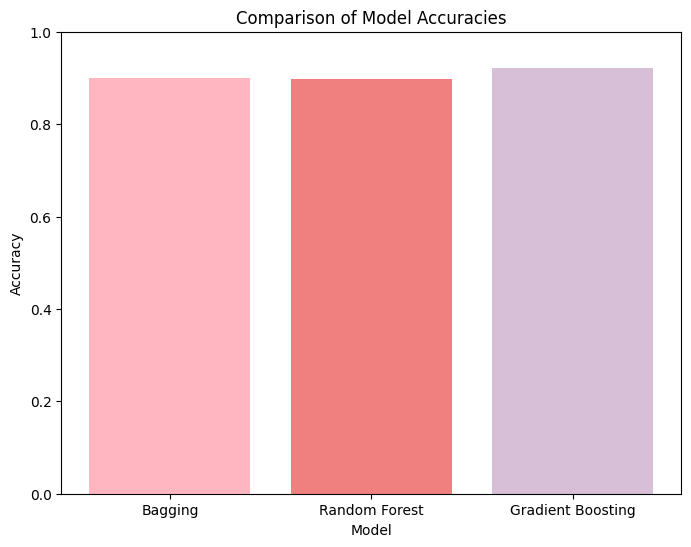

In [41]:
accuracies = [accuracy_bagging, accuracy_rf, accuracy_gb]
models = ['Bagging', 'Random Forest', 'Gradient Boosting']
colors = ['lightpink', 'lightcoral', 'thistle']
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=colors)
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


## 10. Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [42]:
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

###11. Evaluate the model performance

###11.1 Evaluate Gradient Boosting Classifier Performance

In [43]:
y_pred_boosting = boosting_model.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
classification_rep_boosting = classification_report(y_test, y_pred_boosting)
conf_matrix_boosting = confusion_matrix(y_test, y_pred_boosting)

# Print the accuracy
print("Boosting Model Accuracy:", accuracy_boosting)
print("Boosting Model Classification Report:\n", classification_rep_boosting)
print("Boosting Model Confusion Matrix:\n", conf_matrix_boosting)


Boosting Model Accuracy: 0.9214963119072708
Boosting Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.92      0.77      0.84       162
           2       0.76      0.85      0.80       237
           3       0.94      0.94      0.94      1167

    accuracy                           0.92      1898
   macro avg       0.90      0.89      0.89      1898
weighted avg       0.92      0.92      0.92      1898

Boosting Model Confusion Matrix:
 [[ 332    0    0    0]
 [   0  124    0   38]
 [   0    0  201   36]
 [   0   11   64 1092]]


### 11.2 Visualize the Boosting Model Performance

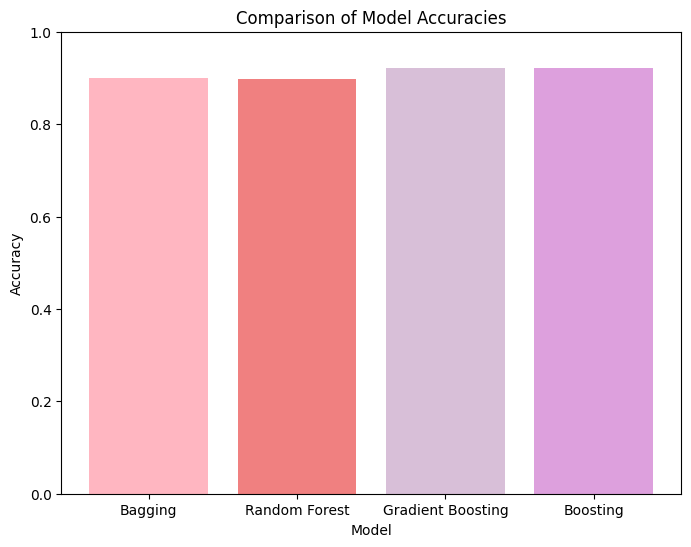

In [44]:
accuracies = [accuracy_bagging, accuracy_rf, accuracy_gb, accuracy_boosting]
models = ['Bagging', 'Random Forest', 'Gradient Boosting', 'Boosting']
colors = ['lightpink', 'lightcoral', 'thistle', 'plum']
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=colors)
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


## 12. Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

### 12.1 Initialize and Train the Stacking Classifier


In [47]:
# Define the base models
estimators = [
    ('bagging', bagging_model),
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model),
    ('boosting', boosting_model)
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Train
stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

StackingClassifier(cv=5,
                   estimators=[('bagging',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                  n_estimators=100,
                                                  random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('boosting',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

##12.2 Evaluate the Stacking Classifier Performance

###12.2.1 Evaluate the Stacking Classifier

In [48]:
y_pred_stacking = stacking_model.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
classification_rep_stacking = classification_report(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

# Print the accuracy and other metrics
print("Stacking Model Accuracy:", accuracy_stacking)
print("Stacking Model Classification Report:\n", classification_rep_stacking)
print("Stacking Model Confusion Matrix:\n", conf_matrix_stacking)


Stacking Model Accuracy: 0.9515279241306639
Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.97      0.80      0.88       162
           2       0.86      0.92      0.89       237
           3       0.96      0.97      0.96      1167

    accuracy                           0.95      1898
   macro avg       0.95      0.92      0.93      1898
weighted avg       0.95      0.95      0.95      1898

Stacking Model Confusion Matrix:
 [[ 332    0    0    0]
 [   0  130    0   32]
 [   0    0  217   20]
 [   0    4   36 1127]]


###12.2.2 Visualize the Stacking Model Performance



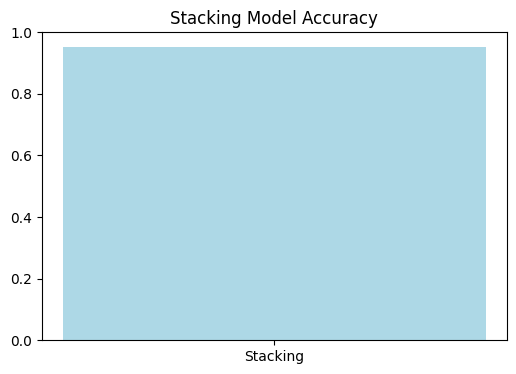

In [50]:
plt.figure(figsize=(6, 4))
plt.bar(['Stacking'], [accuracy_stacking], color='lightblue')
plt.ylim(0, 1)
plt.title('Stacking Model Accuracy')
plt.show()

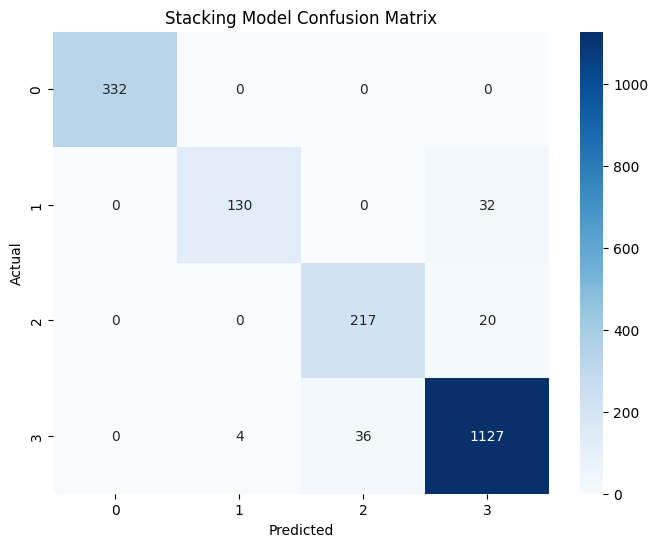

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

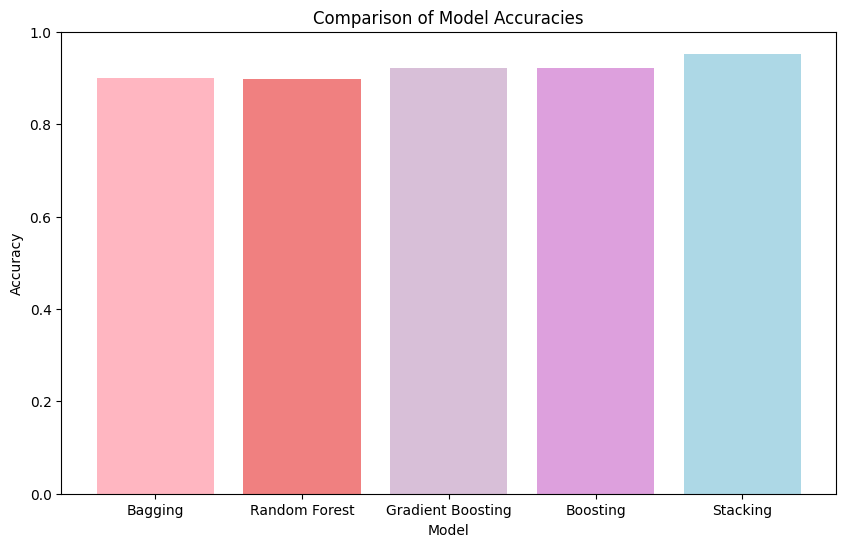

In [52]:
accuracies = [accuracy_bagging, accuracy_rf, accuracy_gb, accuracy_boosting, accuracy_stacking]
models = ['Bagging', 'Random Forest', 'Gradient Boosting', 'Boosting', 'Stacking']
colors = ['lightpink', 'lightcoral', 'thistle', 'plum', 'lightblue']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

### 13. Define meta-learner (LogisticRegression)

In [56]:
meta_learner = LogisticRegression(random_state=42)


## 13.2 Integrate the Meta-Learner into the Stacking Classifier

In [57]:
#(already trained classifiers)
estimators = [
    ('bagging', bagging_model),
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model),
    ('boosting', boosting_model)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_learner, cv=5)

# Train
stacking_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

StackingClassifier(cv=5,
                   estimators=[('bagging',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                  n_estimators=100,
                                                  random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('boosting',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

### 13.2 Integrate the Meta-Learner into the Stacking Classifier

In [58]:
estimators = [
    ('bagging', bagging_model),
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model),
    ('boosting', boosting_model)
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

StackingClassifier(cv=5,
                   estimators=[('bagging',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                  n_estimators=100,
                                                  random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('boosting',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

### 13.3 Evaluate the Stacking Classifier with the Meta-Learner

In [59]:
y_pred_stacking = stacking_model.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
classification_rep_stacking = classification_report(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

print("Stacking Model with Logistic Regression Meta-Learner Accuracy:", accuracy_stacking)
print("Stacking Model Classification Report:\n", classification_rep_stacking)
print("Stacking Model Confusion Matrix:\n", conf_matrix_stacking)


Stacking Model with Logistic Regression Meta-Learner Accuracy: 0.9515279241306639
Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.97      0.80      0.88       162
           2       0.86      0.92      0.89       237
           3       0.96      0.97      0.96      1167

    accuracy                           0.95      1898
   macro avg       0.95      0.92      0.93      1898
weighted avg       0.95      0.95      0.95      1898

Stacking Model Confusion Matrix:
 [[ 332    0    0    0]
 [   0  130    0   32]
 [   0    0  217   20]
 [   0    4   36 1127]]


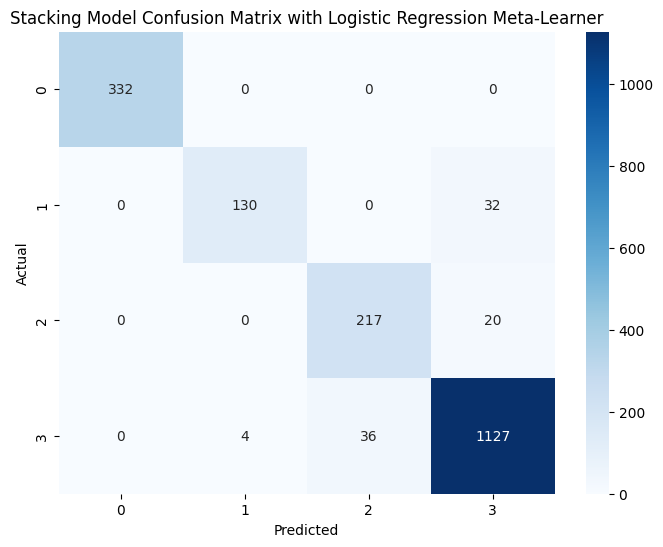

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Model Confusion Matrix with Logistic Regression Meta-Learner')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###14.  Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

###14.1 Initialize the Base Learners and Meta-Learner

In [63]:
estimators = [
    ('bagging', bagging_model),
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model),
    ('boosting', boosting_model)
]
meta_learner = LogisticRegression(random_state=42)


### 14.2 Initialize the Stacking Classifier

In [64]:
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_learner, cv=5)


### 14.3 Train the Stacking Classifier



In [65]:
stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

StackingClassifier(cv=5,
                   estimators=[('bagging',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                  n_estimators=100,
                                                  random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('boosting',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

## 14.4 Evaluate the Stacking Classifier

In [66]:

y_pred_stacking = stacking_model.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
classification_rep_stacking = classification_report(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

#------------------
print("Stacking Model Accuracy:", accuracy_stacking)
print("Stacking Model Classification Report:\n", classification_rep_stacking)
print("Stacking Model Confusion Matrix:\n", conf_matrix_stacking)


Stacking Model Accuracy: 0.9515279241306639
Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.97      0.80      0.88       162
           2       0.86      0.92      0.89       237
           3       0.96      0.97      0.96      1167

    accuracy                           0.95      1898
   macro avg       0.95      0.92      0.93      1898
weighted avg       0.95      0.95      0.95      1898

Stacking Model Confusion Matrix:
 [[ 332    0    0    0]
 [   0  130    0   32]
 [   0    0  217   20]
 [   0    4   36 1127]]


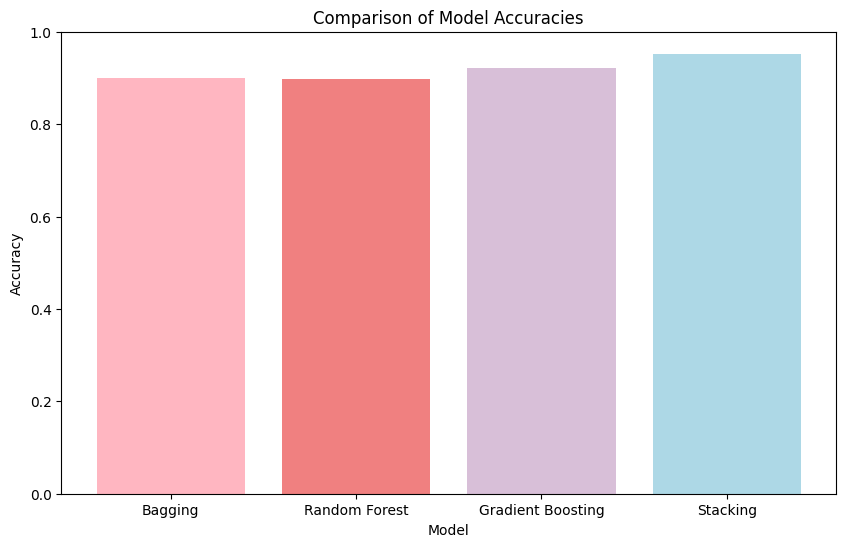

In [70]:
accuracies = [accuracy_bagging, accuracy_rf, accuracy_gb, accuracy_stacking]
models = ['Bagging', 'Random Forest', 'Gradient Boosting', 'Stacking']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['lightpink', 'lightcoral', 'thistle', 'lightblue'])
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


### 15. Evaluate the model performance

## 15.1 Evaluate the Stacking Classifier Performance

In [71]:
y_pred_stacking = stacking_model.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
classification_rep_stacking = classification_report(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

#----------
print("Stacking Model Accuracy:", accuracy_stacking)
print("Stacking Model Classification Report:\n", classification_rep_stacking)
print("Stacking Model Confusion Matrix:\n", conf_matrix_stacking)


Stacking Model Accuracy: 0.9515279241306639
Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.97      0.80      0.88       162
           2       0.86      0.92      0.89       237
           3       0.96      0.97      0.96      1167

    accuracy                           0.95      1898
   macro avg       0.95      0.92      0.93      1898
weighted avg       0.95      0.95      0.95      1898

Stacking Model Confusion Matrix:
 [[ 332    0    0    0]
 [   0  130    0   32]
 [   0    0  217   20]
 [   0    4   36 1127]]


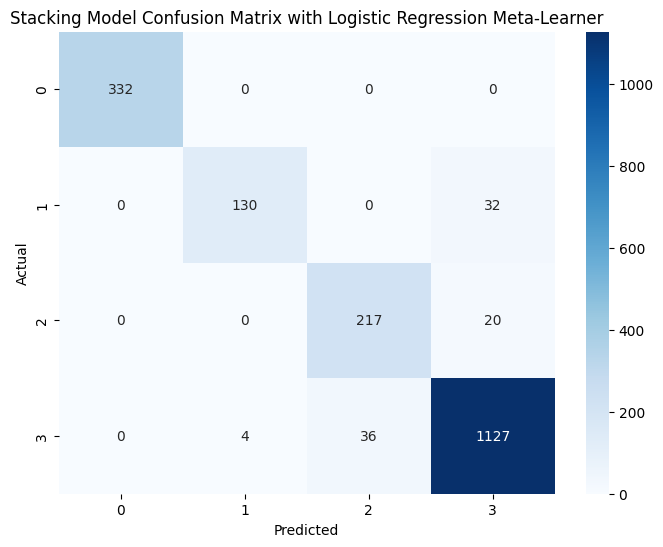

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Model Confusion Matrix with Logistic Regression Meta-Learner')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#16. Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:


### **Feature Selection and Engineering**

#### 1. **Most Important Features and Their Significance**
- **Features**: `CarCount`, `BikeCount`, `BusCount`, `TruckCount`, `Total`.
- **Significance**: These features directly reflect traffic volume, which is critical for predicting traffic conditions.

#### 2. **Feature Engineering and Its Impact**
- **Engineering**: Used `LabelEncoder` to convert categorical variables into numerical ones.
- **Impact**: Improved model understanding of categorical data, potentially enhancing performance.

### **Model Selection**

#### 1. **Choice of Ensemble Methods and Their Advantages**
- **Methods**: `Bagging`, `Random Forest`, `Gradient Boosting`, `Stacking`.
- **Advantages**: Ensemble methods reduce errors and improve accuracy by combining strengths of different models.

#### 2. **Model Performance Comparison**
- **Best Model**: `Stacking` performed the best.
- **Contributing Factors**: It leverages outputs of base models and uses a meta-learner for enhanced accuracy.

### **Model Evaluation**

#### 1. **Evaluation Metrics Used and Insights**
- **Metrics**: Accuracy, confusion matrix, classification report.
- **Insights**:
  - **Accuracy**: General model performance.
  - **Confusion Matrix**: Reveals misclassifications.
  - **Classification Report**: Provides detailed performance across different classes.
